In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import load_model

from sklearn.model_selection import train_test_split

from google.colab.patches import cv2_imshow

In [ ]:
def read_data():
  X = []
  y = []

  folder_path = "/content/drive/MyDrive/NhanDienBienSoXeMay/data/charTrainset"

  for folder in os.listdir(folder_path):

    current_path = os.path.join(folder_path, folder)
    for img in os.listdir(current_path):

      img_path = os.path.join(current_path, img)
      img = cv2.imread(img_path, 0)
      X.append(img)
      y.append(folder)

  return np.array(X, "uint8"), np.array(y)

In [ ]:
def split_data(X, y, size1=0.2, size2=0.5, labels_dict=None):

  num_classes = np.unique(y).shape[0]

  if labels_dict is None:
    labels = np.unique(y)
    labels_dict = {}
    for i in range(num_classes):
      labels_dict[labels[i]] = i

    for idx, _ in enumerate(y):
      print(y[idx], end=" ")
      y[idx] = labels_dict[str(y[idx])]
      print(y[idx], labels_dict[y[idx]])
  else:
    new_y = []
    for idx, value in enumerate(y):
      # y[idx] = labels_dict[value]
      new_y.append(labels_dict[value])


  X_train, X_temp, y_train, y_temp = train_test_split(X, new_y, test_size=size1) # 80% train default
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=size2) # 10% val, 10% test default

  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) / 255
  X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1) / 255
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1) / 255

  y_train = to_categorical(y_train, num_classes)
  y_val = to_categorical(y_val, num_classes)
  y_test = to_categorical(y_test, num_classes)

  return X_train, y_train, X_val, y_val, X_test, y_test, labels_dict, num_classes

In [ ]:
def train_all(X, y):
  num_classes = np.unique(y).shape[0]
  labels = np.unique(y)

  labels_dict = {}
  for i in range(num_classes):
    labels_dict[labels[i]] = i

  for idx, _ in enumerate(y):
    y[idx] = labels_dict[y[idx]]

  X_train = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1) / 255
  y_train = to_categorical(y, num_classes)
  return X_train, y_train, labels_dict, num_classes

In [ ]:
def build_model(input_shape, learning_rate, num_classes):
  # CNN model
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  adam = Adam(learning_rate = learning_rate)
  model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

  model.summary()

  return model

In [2]:
def build_model2(input_shape, learning_rate, num_classes):
  # CNN model
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  # model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  # model.add(Conv2D(64, (3, 3), activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  adam = Adam(learning_rate = learning_rate)
  model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

  model.summary()

  return model

In [ ]:
def build_optimizers(model, learning_rate):
  adam = Adam(learning_rate = learning_rate)

  model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
def train_model(X_train, y_train, X_val, y_val, X_test, y_test, num_classes, batch_size, epochs):

  model = build_model2(X_train.shape[1:], 0.0001, num_classes)

  history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    batch_size = batch_size,
                    epochs = epochs)

  test_loss, test_acc = model.evaluate(X_test, y_test)
  print('test_acc:', test_acc)
  print('test_loss:', test_loss)

  return model, history

In [ ]:
def train_all_2(X_train, y_train, num_classes, batch_size, epochs):
  model = build_model(X_train.shape[1:], 0.0001, num_classes)
  history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs)
  return model, history

In [ ]:
def history_visualization(history, xvalue, yvalue, title, xlabel, ylabel):

  plt.plot(history.history[xvalue])
  plt.plot(history.history[yvalue])
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend(['train', 'val'], loc='best')

In [ ]:
def save_model(model, path):
  model.save(path)

In [ ]:
# if __name__ == "main":
dict1 = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8,
         '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16,
         'H': 17, 'K': 18, 'L': 19, 'M': 20, 'N': 21, 'P': 22, 'R': 23, 'S': 24,
         'T': 25, 'U': 26, 'V': 27, 'X': 28, 'Y': 29, 'Z': 30}
X, y = read_data()
print(y)
X_train, y_train, X_val, y_val, X_test, y_test, labels_dict, num_classes = split_data(X, y, labels_dict=dict1)

FileNotFoundError: ignored

In [ ]:
# X_train, y_train, labels_dict, num_classes = train_all(X, y)
print(labels_dict)

for i in range(15):
  print(np.argmax(y_train[i]))
  plt.imshow(X_train[i].reshape(28,12))
  plt.show()


In [ ]:
X_train.shape
# y_train.shape

(860, 28, 12, 1)

In [ ]:
batch_size = 16
epochs = 15
model, history = train_model(X_train, y_train, X_val, y_val, X_test, y_test, num_classes, batch_size, epochs)
# model, history = train_all_2(X_train, y_train, num_classes, batch_size, epochs)

In [ ]:
path = "/content/drive/MyDrive/NhanDienBienSoXeMay/code/DigitalClassificationModel/"
model_name = input()
save_path = path + model_name + ".h5"
save_model(model, save_path)

15_epochs_model2


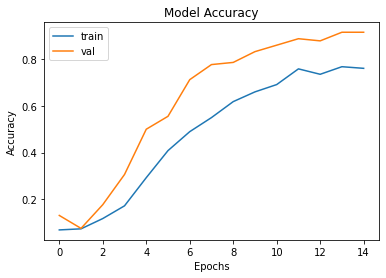

In [ ]:
history_visualization(history, "accuracy", "val_accuracy", "Model Accuracy", "Epochs", "Accuracy")

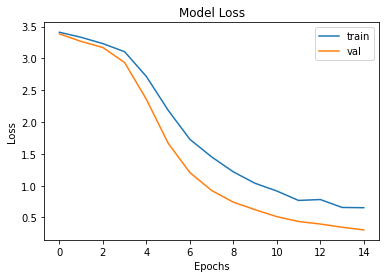

In [ ]:
history_visualization(history, "loss", "val_loss", "Model Loss", "Epochs", "Loss")

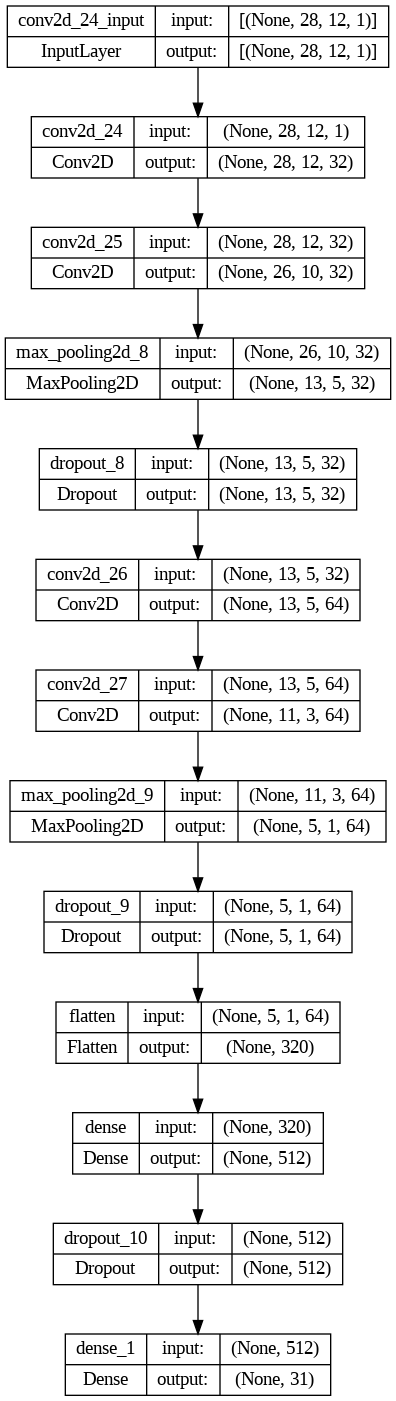

In [8]:
path = "/content/drive/MyDrive/NhanDienBienSoXeMay/code/DigitalClassificationModel/15_epochs_model2.h5"
model = load_model(path)
plot_model(model, to_file="/content/drive/MyDrive/NhanDienBienSoXeMay/code/DigitalClassificationModel/15_epochs_model2.png", show_shapes=True, show_layer_names=True)

**Test**

In [ ]:
img_test_path = "/content/drive/MyDrive/NhanDienBienSoXeMay/data/charTrainset/0/46304_5.jpg"
img_test = cv2.imread(img_test_path, 0)
print(img_test.shape)
cv2_imshow(img_test)
img_test_resize = cv2.resize(img_test,(60,30))
cv2_imshow(img_test_resize)

(28, 12)


In [ ]:
data = np.array(img_test_resize, np.float32) / 255
data = data.reshape(1,60,30,1)

In [ ]:
pred = model.predict(data)

1/1 [==============================] - 0s 24ms/step


In [ ]:
res = list(pred[0])

In [ ]:
print(res.index(max(res)))

1


In [ ]:
X, y = read_data()
X_train, y_train, X_val, y_val, X_test, y_test, labels_dict, num_classes = split_data(X, y)

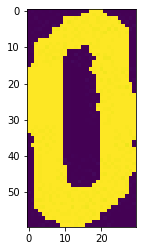

In [ ]:
plt.imshow(X_train[0].reshape(60,30))
plt.show()

In [ ]:
dict1 = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7,
         '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15,
         'G': 16, 'H': 17, 'K': 18, 'L': 19, 'M': 20, 'N': 21, 'P': 22,
         'R': 23, 'S': 24, 'T': 25, 'U': 26, 'V': 27, 'X': 28, 'Y': 29, 'Z': 30}

print(dict1["K"])

18


**SVM**

In [ ]:
from sklearn import svm, metrics
from joblib import dump

In [ ]:
def split_data(X, y, size1=0.2, labels_dict=None):

  num_classes = np.unique(y).shape[0]

  if labels_dict is None:
    labels = np.unique(y)
    labels_dict = {}
    for i in range(num_classes):
      labels_dict[labels[i]] = i

    for idx, _ in enumerate(y):
      print(y[idx], end=" ")
      y[idx] = labels_dict[str(y[idx])]
      print(y[idx], labels_dict[y[idx]])
  else:
    new_y = []
    for idx, value in enumerate(y):
      # y[idx] = labels_dict[value]
      new_y.append(labels_dict[value])


  X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size=size1)

  X_train = X_train.reshape(X_train.shape[0], -1)
  X_test = X_test.reshape(X_test.shape[0], -1)

  # y_train = to_categorical(y_train, num_classes)
  # y_test = to_categorical(y_test, num_classes)

  return X_train, y_train, X_test, y_test, labels_dict, num_classes

In [ ]:
def take_all_data(X, y, labels_dict=None):
  num_classes = np.unique(y).shape[0]

  if labels_dict is None:
    labels = np.unique(y)
    labels_dict = {}
    for i in range(num_classes):
      labels_dict[labels[i]] = i

    for idx, _ in enumerate(y):
      print(y[idx], end=" ")
      y[idx] = labels_dict[str(y[idx])]
      print(y[idx], labels_dict[y[idx]])
  else:
    new_y = []
    for idx, value in enumerate(y):
      # y[idx] = labels_dict[value]
      new_y.append(labels_dict[value])

  X_train = np.array([cv2.threshold(x, 40, 255, cv2.THRESH_BINARY)[1] for x in X], np.uint8)
  X_train = X_train.reshape(X.shape[0], -1)

  return X_train, new_y, labels_dict, num_classes

In [ ]:
def SVM_Classification(X_train, y_train, X_test = None, y_test=None, save = False):

  clf = svm.SVC(kernel="rbf", max_iter=200, probability=True)
  clf.fit(X_train, y_train)
  if X_test is not None and y_test is not None:
    pred = clf.predict(X_test)
    print(
      f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, pred)}\n")

    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred)
    disp.figure_.suptitle("Confusion Matrix")
    print(f"Confusion matrix:\n{disp.confusion_matrix}")
    plt.show()

  if save is True:
     dump(clf, '/content/drive/MyDrive/NhanDienBienSoXeMay/code/DigitalClassificationModel/SVM3.joblib')

In [ ]:
dict1 = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8,
         '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16,
         'H': 17, 'K': 18, 'L': 19, 'M': 20, 'N': 21, 'P': 22, 'R': 23, 'S': 24,
         'T': 25, 'U': 26, 'V': 27, 'X': 28, 'Y': 29, 'Z': 30}
X, y = read_data()
print(y)
# X_train, y_train, X_test, y_test, labels_dict, num_classes = split_data(X, y, labels_dict=dict1)

['0' '0' '0' ... 'P' 'P' 'P']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for classifier SVC(max_iter=200, probability=True):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.88      1.00      0.93        14
           2       0.90      1.00      0.95         9
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         6
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00        15
          12       0.92      1.00      0.96        11
          13       1.00      0.89      0.94         9
          14       0.94      0.94      0.94        17
          15       1.00      0.75      0.86         4
          16       1.00      1.00      1.00         5
       

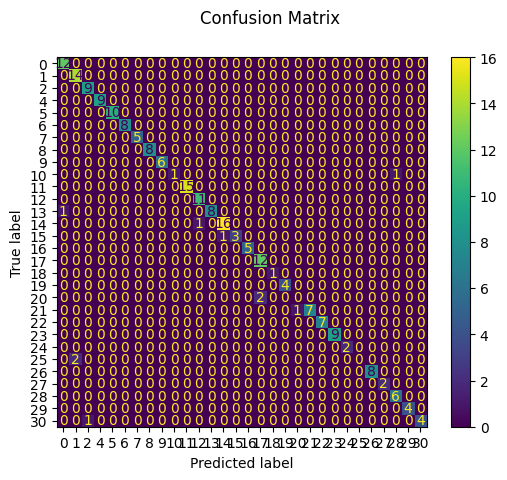

In [ ]:
X_train, y_train, X_test, y_test, labels_dict, num_classes = split_data(X, y, size1=0.2, labels_dict=dict1)
SVM_Classification(X_train, y_train, X_test, y_test)

In [ ]:
X_train, y_train, labels_dict, num_classes = take_all_data(X, y, labels_dict=dict1)
SVM_Classification(X_train, y_train, save=True)

NameError: ignored

In [ ]:
for x, Y in zip(X, y):
  print(Y)
  cv2_imshow(cv2.threshold(x, 40, 255, cv2.THRESH_BINARY)[1])

In [ ]:
X.shape

(1076, 28, 12)

In [ ]:
X_new = np.array([cv2.threshold(x, 40, 255, cv2.THRESH_BINARY)[1] for x in X], np.uint8)

In [ ]:
X_new.shape

(1076, 28, 12)

In [ ]:
for x in X_new:
  cv2_imshow(x)